In [1]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# What is Pandas?

pandas is a major tool of interest for data scientists and analysts and it has a lot of focus throughout the rest of the book. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. 
<br>
Pandas is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy’s idiomatic style of array-based computing, especially array-based functions and a preference for data processing without for loops.
<br>
While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.
Since becoming an open source project in 2010, pandas has matured into a quite large library that’s applicable in a broad set of real-world use cases. The developer community has grown to over 800 distinct contributors, who’ve been helping build the project as they’ve used it to solve their day-to-day data problems.

In [2]:
import pandas as pd

# Data Loading, Storage, 

First let's learn how easy it is to load data from files into your python. Pandas can also be useful in loading data from excel, database, websites, ... etc. As the source differs, the imported format is the same. Meaning that no matter what data source you load from, all data manipulations and operation you will learn here still the same

In [3]:
import numpy as np
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

## Reading and Writing Data in Text Format

In [4]:
# this is a shell command not python command to 
# show you what is inside the file without having to open it from outside Jupyter
!cat examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [5]:
# this is how we read a CSV file in python using pandas
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


The seperator is comma by default but if it is something different like tab or space, you can tell pandas what separator do you want to use by adding `sep=` to the read function

In [6]:
pd.read_table('examples/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
!cat examples/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

As you can see, this file has no headers, to specify that, you use `header=None` and columns will be named automatically by pandas

In [8]:
pd.read_csv('examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
# You can also assign headers yourself using names
df=pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Now that you have the table ready, you can do all sort of things with it. Similar to numpy you can do all nice math operations, logical indexing and others

In [11]:
df>3
df[df>3]
df*2

,a,b,c,d,message
0,False,False,False,True,True
1,True,True,True,True,True
2,True,True,True,True,True


,a,b,c,d,message
0,NaN,NaN,NaN,4,hello
1,5.0,6.0,7.0,8,world
2,9.0,10.0,11.0,12,foo


,a,b,c,d,message
0,2,4,6,8,hellohello
1,10,12,14,16,worldworld
2,18,20,22,24,foofoo


# Accessing table elements
You can access a Pandas table in many different ways. 

First you need to know that you can form a pandas dataframe/table from a dictionary. Yes, a dictionary is just a table with keys, right?

In [13]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame
frame.head(3)  # first three elements
frame.tail(3)  # last three elements

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


,state,year,pop
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


You can index that frame in different ways

In [14]:
frame['state']
frame.year
frame.year[4]
frame[1:]
frame[1:]['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

2002

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [15]:
frame.loc[3]

state    Nevada
year       2001
pop         2.4
Name: 3, dtype: object

You can also add any new columns to the table

In [16]:
frame['is_ohio'] = frame.state == 'Ohio'
frame

,state,year,pop,is_ohio
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


You can also delete columns from the table. This is particularly helpful when you have huge table and you want to reduce the memory space.

In [17]:
del frame['is_ohio']
frame
frame.columns

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Index(['state', 'year', 'pop'], dtype='object')

Guess what, you can also transpose a frame.

In [18]:
frame.T

,0,1,2,3,4,5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2


# Reindexing
Can I change the column names and rows names?
I think we can do better, if we make row index as the year and column index as the state



In [19]:
frame.index=frame.year
frame
frame.loc[2001]

,state,year,pop
year,,,
2000,Ohio,2000,1.5
2001,Ohio,2001,1.7
2002,Ohio,2002,3.6
2001,Nevada,2001,2.4
2002,Nevada,2002,2.9
2003,Nevada,2003,3.2


,state,year,pop
year,,,
2001,Ohio,2001,1.7
2001,Nevada,2001,2.4


An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index. Consider an example

In [20]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
# pd.series, creates pandas objects in a series fashion, for example instant 1, 2, 3, .. etc
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [21]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

As you can see, new instants gets filled with `Nan`, which means not a number i.e., it does not have a value. When you load or read big data, most of the time there are empty values or incompatiable values that may get translated to a Nan. Part of the data clean up process will be to fill up these NaNs with the right values or get rid of them. We will talk more about them in the next class. 

### Dropping Entries from an Axis

In [22]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


you can drop full rows

In [23]:
modified_data=data.drop(['Colorado', 'Ohio'])

You can also drop  columns

In [24]:
data.drop('two', axis=1)
data.drop(['two', 'four'], axis='columns')
data

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [25]:
# if you want to override the data
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data
data.drop('two', axis=1, inplace=True)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### Arithmetic and Data Alignment

In [26]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1
df2

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [27]:
df1 + df2
df1.add(df2, fill_value=0)

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


As you can see, using `fill_value`, overcomes the NaN problem in many cases when the entry is defined in one table but not the other. However, you will still get a NaN when the entry is not defined in both tables.

# Let's process some stocks data

In this example, we will get to know about some of the pandas data processing and statistical capabilities

In [28]:
price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')
price
price['2016']  # when index is date, you can use date parts like year to get all data that belongs to this date part

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571
2010-01-11,27.480148,300.255255,110.763844,25.315406
2010-01-12,27.167562,294.945572,111.644958,25.148142
2010-01-13,27.550775,293.252243,111.405433,25.382312
2010-01-14,27.391211,294.630868,113.184773,25.892466


,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-01-04,103.586180,741.840027,132.147757,53.696756
2016-01-05,100.990380,742.580017,132.050563,53.941723
2016-01-06,99.014030,743.619995,131.389573,52.961855
2016-01-07,94.835186,726.390015,129.144181,51.119702
2016-01-08,95.336649,714.469971,127.948586,51.276485
2016-01-11,96.880363,716.030029,129.503829,51.247086
2016-01-12,98.286422,726.070007,129.183056,51.717422
2016-01-13,95.759450,700.559998,127.501445,50.600373
2016-01-14,97.853786,714.719971,129.192786,52.040780


We can see how the stock changes day by day and what is the percentage of increase/decrease for each stock per day

In [29]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


We can analyze correlation between the returns of two stocks such as IBM and Microsoft

In [30]:
returns['MSFT'].corr(returns['IBM'])
returns['MSFT'].cov(returns['IBM'])
returns.mean(axis=1)
price.mean(axis=0)

0.4997636114415114

8.870655479703546e-05

Date
2010-01-04         NaN
2010-01-05   -0.003608
2010-01-06   -0.013437
2010-01-07   -0.009747
2010-01-08    0.009228
2010-01-11   -0.008381
2010-01-12   -0.006928
2010-01-13    0.003883
2010-01-14    0.008745
2010-01-15   -0.010162
2010-01-19    0.020765
2010-01-20   -0.018265
2010-01-21   -0.010354
2010-01-22   -0.042068
2010-01-25    0.006519
2010-01-26    0.005455
2010-01-27    0.004801
2010-01-28   -0.023335
2010-01-29   -0.022254
2010-02-01    0.011626
2010-02-02    0.002724
2010-02-03    0.010620
2010-02-04   -0.027690
2010-02-05    0.009253
2010-02-08   -0.005581
2010-02-09    0.009401
2010-02-10   -0.003281
2010-02-11    0.008495
2010-02-12   -0.000521
2010-02-16    0.015030
                ...   
2016-09-12    0.016591
2016-09-13   -0.003277
2016-09-14    0.005750
2016-09-15    0.018284
2016-09-16   -0.005000
2016-09-19   -0.003673
2016-09-20    0.000637
2016-09-21    0.007444
2016-09-22    0.007087
2016-09-23   -0.007760
2016-09-26   -0.007575
2016-09-27    0.012450
2016-0

AAPL     74.665633
GOOG    451.536210
IBM     154.683470
MSFT     33.797345
dtype: float64

In [31]:
returns.corrwith(volume) # calculates pairwise correlation
price.describe()

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

,AAPL,GOOG,IBM,MSFT
count,1714.000000,1714.000000,1714.000000,1714.000000
mean,74.665633,451.536210,154.683470,33.797345
std,28.544699,167.737989,22.746468,11.234714
min,25.118093,217.817563,104.698697,19.420951
25%,50.028231,297.680337,142.436392,24.067961
50%,72.885582,432.715522,158.305000,29.356566
75%,98.217933,571.076931,173.465425,43.152811
max,129.180748,801.500000,195.359927,59.660000


You can also plot .. we will discuss plots later in much more details

In [32]:
price.plot()
price.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d3ca198>,
      dtype=object)

# Some Other Cool Functions

Pandas provide a lot of cool data manipulations functionalities similar to what we have seen in Numpy

In [33]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [34]:
data['Qu1'].unique()
data['Qu2'].value_counts()

array([1, 3, 4])

3    2
2    2
1    1
Name: Qu2, dtype: int64

# Can Pandas read and write more than CSV?
Pandas can read and write data from excel

In [35]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame
frame.to_excel('my_first_excel_pandas.xlsx')
frame.to_csv('my_first_csv_pandas.csv', sep='-')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### XML and HTML: Web Scraping

Pandas has a great abbilities to read and scrape data from the web. Here is the following example to read the table of the failed banks from Fedral deposit insurance corporation webpage

In [36]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()

1

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


After that, you can simply process it. For example, we can transform the closing dates from string to dates then count per year how many banks closed down each year

In [37]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps
close_count_per_year=close_timestamps.dt.year.value_counts()
close_count_per_year

0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
5     2015-10-02
6     2015-10-02
7     2015-07-10
8     2015-05-08
9     2015-02-27
10    2015-02-13
11    2015-01-23
12    2015-01-16
13    2014-12-19
14    2014-11-07
15    2014-10-24
16    2014-10-17
17    2014-07-25
18    2014-07-18
19    2014-06-27
20    2014-06-20
21    2014-06-20
22    2014-05-30
23    2014-05-23
24    2014-05-16
25    2014-04-25
26    2014-02-28
27    2014-02-28
28    2014-01-31
29    2014-01-24
         ...    
517   2008-05-09
518   2008-03-07
519   2008-01-25
520   2007-10-04
521   2007-09-28
522   2007-02-02
523   2004-06-25
524   2004-03-19
525   2004-03-12
526   2004-02-14
527   2003-11-14
528   2003-05-09
529   2003-02-07
530   2002-12-17
531   2002-11-08
532   2002-09-30
533   2002-06-27
534   2002-06-26
535   2002-03-28
536   2002-03-01
537   2002-02-07
538   2002-02-01
539   2002-01-18
540   2002-01-11
541   2001-09-07
542   2001-07-27
543   2001-05-03
544   2001-02-

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

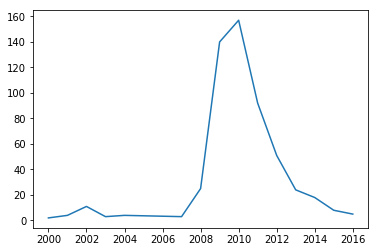

In [38]:
close_count_per_year.sort_index().plot()

In additon, Pandas can read also from HDF5 format (hadoop), Databases such as SQL, Web APIs and much more. Refer to Chapter 6 of the book for more details

## Conclusion